## 📈 Análise do Potencial de Crescimento Empresarial

Este notebook tem como objetivo realizar uma análise preditiva do **potencial de crescimento das empresas**, utilizando técnicas de **Data Science** e **Machine Learning**. A principal motivação deste estudo é entender quais fatores — tanto financeiros quanto macroeconômicos — impactam diretamente o crescimento das empresas no continente americano.

Para isso, foram coletados e integrados dados de múltiplas fontes, incluindo:

- Indicadores **microeconômicos** (ex: market cap, dividend yield, P/E ratio, entre outros)
- Indicadores **macroeconômicos** de cada país (ex: PIB per capita, inflação, taxa de juros, taxa de desemprego)

O processo envolveu:

- 🧹 **Limpeza e tratamento dos dados**
- 📊 **Análise exploratória e visualizações**
- 🧠 **Clusterização com KMeans** para categorizar as empresas conforme seu potencial de crescimento
- 🤖 **Construção de modelos supervisionados** para prever a classe de crescimento
- 📊 **Avaliação dos resultados** e análise de erros

Este projeto integra habilidades técnicas e analíticas com foco em aplicações práticas para o mundo dos negócios, sendo parte do meu portfólio como entusiasta e autodidata em **Ciência de Dados**.

### 1. Coleta de Dados

In [145]:
# Importando bibliotecas
import pandas as pd
import numpy as np

In [146]:
# Carregando dados
df1 = pd.read_csv("Companies_ranked_by_Dividend_Yield.csv")
df2 = pd.read_csv("Companies_ranked_by_Earnings.csv")
df3 = pd.read_csv("Companies_ranked_by_Market_Cap.csv")
df4 = pd.read_csv("Companies_ranked_by_P_E_ratio.csv")
df5 = pd.read_csv("Companies_ranked_by_Revenue.csv")

In [147]:
# Verifiquei os dataframes
df3.head()

,Rank,Name,Symbol,marketcap,price (GBP),country
0,1,Apple,AAPL,2.689903e+12,176.919492,United States
1,2,Microsoft,MSFT,2.427170e+12,326.537958,United States
2,3,NVIDIA,NVDA,2.259353e+12,92.105725,United States
3,4,Alphabet (Google),GOOG,1.549815e+12,126.458691,United States
4,5,Amazon,AMZN,1.506038e+12,143.492307,United States


**Compreendi que todos os dataframes possuem colunas em comum e que a única coluna que difere é a coluna denúmero 3.**

In [148]:
# Imprimi a coluna 3 do dataframe
df3.iloc[:, 3].head()

0    2.689903e+12
1    2.427170e+12
2    2.259353e+12
3    1.549815e+12
4    1.506038e+12
Name: marketcap, dtype: float64

In [149]:
# Criei uma função para manter apenas as colunas 1 "Name" e 3 "VARIÁVEL DE INTERESSE" de cada dataframe

def manter_colunas(df):
    # criei um dataframe igual ao df original com as colunas 1 e 3 apenas
    df = df.iloc[:, [1, 3]]
    # Imprimi as primeiras linhas do dataframe
    df.head()
    # Retornei o dataframe
    return df

In [150]:
df2 = manter_colunas(df2)
df3 = manter_colunas(df3)
df4 = manter_colunas(df4)
df5 = manter_colunas(df5)

In [151]:
df2.head()

,Name,earnings_ttm
0,Saudi Aramco,2.283780e+11
1,Apple,1.216250e+11
2,Microsoft,1.077870e+11
3,Alphabet (Google),1.018210e+11
4,Berkshire Hathaway,8.890400e+10


In [152]:
# Criei uma função para mergir os dataframes no df1 a partir da coluna "Name"

def mergir_dataframes (df_final,dfb, dfc, dfd, dfe):
    # Mergi os dataframes b, c, d e e no dataframe final a partir da coluna "Name"
    df_final = pd.merge(df_final, dfb, on="Name", how="left")
    df_final = pd.merge(df_final, dfc, on="Name", how="left")
    df_final = pd.merge(df_final, dfd, on="Name", how="left")
    df_final = pd.merge(df_final, dfe, on="Name", how="left")
    # Imprimi as primeiras linhas do dataframe final
    df_final.head()
    # Retornei o dataframe final
    return df_final

In [153]:
data = mergir_dataframes(df1,df2,df3,df4,df5)

In [154]:
data.head()

,Rank,Name,Symbol,dividend_yield_ttm,price (GBP),country,earnings_ttm,marketcap,pe_ratio_ttm,revenue_ttm
0,1,LianBio,LIAN,300940.0,0.243065,United States,-8.710700e+07,2.626636e+07,-0.403797,0
1,2,Richter Gedeon,RIG2.F,150430.0,23.726825,Hungary,4.465570e+08,4.330167e+09,20.707700,3435019066
2,3,Delek Group,DLEKG.TA,117114.0,87.735884,Israel,1.084660e+09,1.630925e+09,-27.898300,3144217178
3,4,LMP Automotive Holdings,LMPX,106250.0,0.121914,United States,1.175030e+06,1.454612e+06,-0.150943,318486368
4,5,MBIA,MBI,22346.4,2.727817,United States,-6.630000e+08,1.391956e+08,-0.710317,-48000000


### 2. Filtragem de Dados

In [155]:
# Verifiquei os valores únicos da coluna "country"
data["country"].unique()

array(['United States', 'Hungary', 'Israel', 'Germany', 'Bahrain',
       'China', 'Philippines', 'Brazil', 'Denmark', 'Hong Kong', 'Sweden',
       'South Africa', 'United Kingdom', 'Colombia', 'Belgium', 'France',
       'Luxembourg', 'Austria', 'Saudi Arabia', 'Norway', 'Canada',
       'New Zealand', 'Russia', 'Japan', 'Singapore', 'Kazakhstan',
       'Poland', 'Bermuda', 'Turkey', 'Spain', 'Australia', 'Mexico',
       'Greece', 'Italy', 'Finland', 'Netherlands', 'Estonia',
       'Indonesia', 'Czech Republic', 'Qatar', 'Portugal', 'Argentina',
       'Cayman Islands', 'Chile', 'Thailand', 'Switzerland', 'Nigeria',
       'South Korea', 'United Arab Emirates', 'Taiwan', 'Malaysia',
       'Iceland', 'Jersey', 'Ireland', 'Lithuania', 'India', 'Panama',
       'Monaco', 'Peru', 'Jordan', 'Macau', nan, 'Uruguay', 'Isle of Man',
       'Malta', 'Romania', 'Guernsey', 'Egypt', 'Cyprus', 'Bahamas',
       'Costa Rica', 'British Virgin Islands', 'Cambodia', 'Gibraltar',
       'Kuwait',

**Percebi uma duplicata semântica na coluna "country" (United States/USA), padronizei todos os valores USA para United States**

In [156]:
# Padronizei os valores da coluna "country"
data["country"] = data["country"].str.replace("USA", "United States")

In [157]:
# Verifiquei os valores únicos da coluna "country"
data["country"].unique()

array(['United States', 'Hungary', 'Israel', 'Germany', 'Bahrain',
       'China', 'Philippines', 'Brazil', 'Denmark', 'Hong Kong', 'Sweden',
       'South Africa', 'United Kingdom', 'Colombia', 'Belgium', 'France',
       'Luxembourg', 'Austria', 'Saudi Arabia', 'Norway', 'Canada',
       'New Zealand', 'Russia', 'Japan', 'Singapore', 'Kazakhstan',
       'Poland', 'Bermuda', 'Turkey', 'Spain', 'Australia', 'Mexico',
       'Greece', 'Italy', 'Finland', 'Netherlands', 'Estonia',
       'Indonesia', 'Czech Republic', 'Qatar', 'Portugal', 'Argentina',
       'Cayman Islands', 'Chile', 'Thailand', 'Switzerland', 'Nigeria',
       'South Korea', 'United Arab Emirates', 'Taiwan', 'Malaysia',
       'Iceland', 'Jersey', 'Ireland', 'Lithuania', 'India', 'Panama',
       'Monaco', 'Peru', 'Jordan', 'Macau', nan, 'Uruguay', 'Isle of Man',
       'Malta', 'Romania', 'Guernsey', 'Egypt', 'Cyprus', 'Bahamas',
       'Costa Rica', 'British Virgin Islands', 'Cambodia', 'Gibraltar',
       'Kuwait',

In [158]:
# Criei uma lista com os países dos continentes americanos
paises_americanos = [
    'United States', 'Brazil', 'Colombia', 'Canada', 'Mexico',
    'Argentina', 'Cayman Islands', 'Chile', 'Panama', 'Peru', 'Uruguay',
    'Bahamas', 'Costa Rica', 'British Virgin Islands'
]

In [159]:
# Filtrei os dados com as entradas que possuem países do continente americano
data = data[data["country"].isin(paises_americanos)]

In [160]:
# Verifiquei o shape do dataframe
data.shape

(4405, 10)

In [161]:
# Verifiquei o tipo de dados de cada coluna
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4405 entries, 0 to 10001
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                4405 non-null   int64  
 1   Name                4405 non-null   object 
 2   Symbol              4405 non-null   object 
 3   dividend_yield_ttm  4405 non-null   float64
 4   price (GBP)         4405 non-null   float64
 5   country             4405 non-null   object 
 6   earnings_ttm        4405 non-null   float64
 7   marketcap           4405 non-null   float64
 8   pe_ratio_ttm        4405 non-null   float64
 9   revenue_ttm         4405 non-null   int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 378.6+ KB


**A coluna divident_yield deve se referir aos dividendos totais do ano e não ao dividend_yield, desta forma utilizei uma formula paraa coluna de dividend_yield**

In [162]:
# Calculei o total de ações em circulação para cada empresa
data["total_shares"] = data["marketcap"] / data["price (GBP)"]

In [163]:
data.head()

,Rank,Name,Symbol,dividend_yield_ttm,price (GBP),country,earnings_ttm,marketcap,pe_ratio_ttm,revenue_ttm,total_shares
0,1,LianBio,LIAN,300940.00,0.243065,United States,-87107000.0,2.626636e+07,-0.403797,0,1.080630e+08
3,4,LMP Automotive Holdings,LMPX,106250.00,0.121914,United States,1175030.0,1.454612e+06,-0.150943,318486368,1.193150e+07
4,5,MBIA,MBI,22346.40,2.727817,United States,-663000000.0,1.391956e+08,-0.710317,-48000000,5.102820e+07
7,8,TRxADE HEALTH,MEDS,10540.20,5.783276,United States,-20149200.0,1.012108e+07,-1.533330,4429155,1.750060e+06
8,9,Merrimack Pharmaceuticals,MACK,9980.17,11.528455,United States,-2259000.0,1.704874e+08,-137.545000,0,1.478840e+07


In [164]:
# Agora criei uma nova coluna de dividend_yield
data["dividend_yield"] = (data["dividend_yield_ttm"] / (data["total_shares"] * data["price (GBP)"]))*100

In [165]:
data.head()

,Rank,Name,Symbol,dividend_yield_ttm,price (GBP),country,earnings_ttm,marketcap,pe_ratio_ttm,revenue_ttm,total_shares,dividend_yield
0,1,LianBio,LIAN,300940.00,0.243065,United States,-87107000.0,2.626636e+07,-0.403797,0,1.080630e+08,1.145724
3,4,LMP Automotive Holdings,LMPX,106250.00,0.121914,United States,1175030.0,1.454612e+06,-0.150943,318486368,1.193150e+07,7.304353
4,5,MBIA,MBI,22346.40,2.727817,United States,-663000000.0,1.391956e+08,-0.710317,-48000000,5.102820e+07,0.016054
7,8,TRxADE HEALTH,MEDS,10540.20,5.783276,United States,-20149200.0,1.012108e+07,-1.533330,4429155,1.750060e+06,0.104141
8,9,Merrimack Pharmaceuticals,MACK,9980.17,11.528455,United States,-2259000.0,1.704874e+08,-137.545000,0,1.478840e+07,0.005854


In [166]:
# Dropei as colunas desnecessários
columns_drop = ['Rank', 'Symbol', 'dividend_yield_ttm']

for column in columns_drop:
    data = data.drop(column, axis=1)

**Converti os valores de GBP para USD**

In [167]:
# Converti os valores para dólar
taxa_cambio_gbp_usd = 1.25

columns_gbp = [
    'price (GBP)',
    'earnings_ttm',
    'marketcap',
    'revenue_ttm'
]

for column in columns_gbp:
    data[column] = data[column] * taxa_cambio_gbp_usd

In [168]:
# Renomeei a coluna price (GBP) para price
data = data.rename(columns={"price (GBP)": "price"})
data.head()

,Name,price,country,earnings_ttm,marketcap,pe_ratio_ttm,revenue_ttm,total_shares,dividend_yield
0,LianBio,0.303832,United States,-108883750.0,3.283295e+07,-0.403797,0.000000e+00,1.080630e+08,1.145724
3,LMP Automotive Holdings,0.152392,United States,1468787.5,1.818265e+06,-0.150943,3.981080e+08,1.193150e+07,7.304353
4,MBIA,3.409771,United States,-828750000.0,1.739945e+08,-0.710317,-6.000000e+07,5.102820e+07,0.016054
7,TRxADE HEALTH,7.229095,United States,-25186500.0,1.265135e+07,-1.533330,5.536444e+06,1.750060e+06,0.104141
8,Merrimack Pharmaceuticals,14.410569,United States,-2823750.0,2.131093e+08,-137.545000,0.000000e+00,1.478840e+07,0.005854


### 3. Limpeza de Dados

In [169]:
# Verifiquei por valores duplicados na coluna "Name"
data["Name"].duplicated().sum()

np.int64(46)

In [170]:
# Printei as linhas com valores duplicados na coluna "Name"
data[data["Name"].duplicated()]

,Name,price,country,earnings_ttm,marketcap,pe_ratio_ttm,revenue_ttm,total_shares,dividend_yield
1371,First Bancorp,24.877994,United States,180015000.0,1.604682e+09,8.945210,9.694625e+07,6.450207e+07,0.000031
1372,First Bancorp,24.877994,United States,180015000.0,1.604682e+09,14.292600,4.811762e+08,6.450207e+07,0.000031
1373,First Bancorp,24.877994,United States,180015000.0,1.604682e+09,14.292600,9.694625e+07,6.450207e+07,0.000031
1374,First Bancorp,24.877994,United States,180015000.0,2.772429e+08,8.945210,4.811762e+08,1.114410e+07,0.000181
1375,First Bancorp,24.877994,United States,180015000.0,2.772429e+08,8.945210,9.694625e+07,1.114410e+07,0.000181
1376,First Bancorp,24.877994,United States,180015000.0,2.772429e+08,14.292600,4.811762e+08,1.114410e+07,0.000181
1377,First Bancorp,24.877994,United States,180015000.0,2.772429e+08,14.292600,9.694625e+07,1.114410e+07,0.000181
1378,First Bancorp,24.877994,United States,39838750.0,1.604682e+09,8.945210,4.811762e+08,6.450207e+07,0.000031
1379,First Bancorp,24.877994,United States,39838750.0,1.604682e+09,8.945210,9.694625e+07,6.450207e+07,0.000031
1380,First Bancorp,24.877994,United States,39838750.0,1.604682e+09,14.292600,4.811762e+08,6.450207e+07,0.000031


In [171]:
# Dropei os valores duplicados mantendo o primeiro de cada
data = data.drop_duplicates(subset=["Name"], keep="first")

In [172]:
# Verifiquei por valores duplicados na coluna "Name"
data["Name"].duplicated().sum()

np.int64(0)

In [173]:
# Verifiquei por valores nulos em cada coluna
data.isna().sum()

Name              0
price             0
country           0
earnings_ttm      0
marketcap         0
pe_ratio_ttm      0
revenue_ttm       0
total_shares      0
dividend_yield    1
dtype: int64

In [174]:
# Printei as linhas com valores nulos
data[data.isna().any(axis=1)]

,Name,price,country,earnings_ttm,marketcap,pe_ratio_ttm,revenue_ttm,total_shares,dividend_yield
6692,Ozon,43.307901,United States,0.0,0.0,-18.0425,0.0,0.0,NaN


In [175]:
# Dropei as linhas com valores nulos
data = data.dropna()

In [176]:
# Verifiquei por valores nulos em cada coluna novamente
data.isna().sum()

Name              0
price             0
country           0
earnings_ttm      0
marketcap         0
pe_ratio_ttm      0
revenue_ttm       0
total_shares      0
dividend_yield    0
dtype: int64

### 4. Análise Exploratória e Visualização

In [177]:
# Importei bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt

In [178]:
# Fiz a descricao estatística dos dados
data.describe()

,price,earnings_ttm,marketcap,pe_ratio_ttm,revenue_ttm,total_shares,dividend_yield
count,4358.000000,4.358000e+03,4.358000e+03,4.358000e+03,4.358000e+03,4.358000e+03,4358.000000
mean,58.480111,8.589892e+08,1.382954e+10,-1.103165e+15,7.119207e+09,2.902877e+08,0.002009
std,266.327226,5.342131e+09,1.015762e+11,7.088896e+16,3.209371e+10,1.980162e+09,0.112006
min,0.000095,-1.636375e+10,1.733459e+02,-4.677980e+18,-4.249488e+08,2.591350e+05,0.000000
25%,4.420482,-3.462156e+07,2.249869e+08,-3.247028e+00,1.123172e+08,2.990530e+07,0.000000
50%,16.615966,4.129500e+07,1.184656e+09,7.079760e+00,8.037100e+08,6.851297e+07,0.000000
75%,50.242928,3.837631e+08,5.328059e+09,2.124790e+01,3.595594e+09,1.759650e+08,0.000005
max,11429.400000,1.520312e+11,3.362378e+12,1.991690e+04,8.312938e+11,1.072800e+11,7.304353


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'earnings_ttm'}>,
        <Axes: title={'center': 'marketcap'}>],
       [<Axes: title={'center': 'pe_ratio_ttm'}>,
        <Axes: title={'center': 'revenue_ttm'}>,
        <Axes: title={'center': 'total_shares'}>],
       [<Axes: title={'center': 'dividend_yield'}>, <Axes: >, <Axes: >]],
      dtype=object)

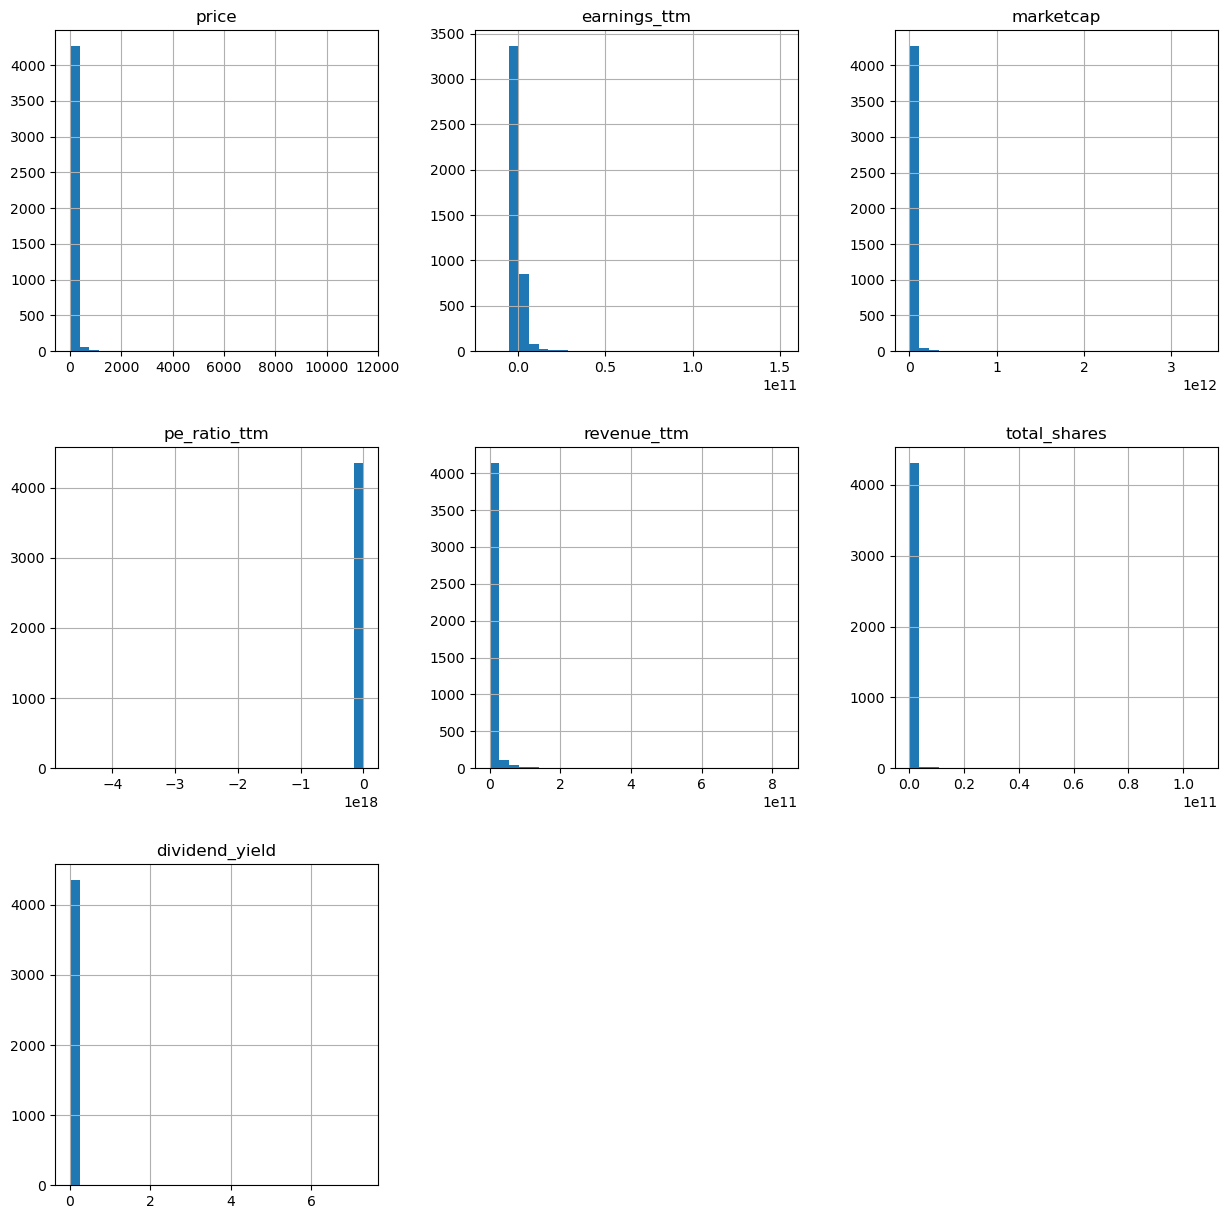

In [179]:
# Criei um dataframe numérico
data_numeric = data.select_dtypes(include=np.number)

# Criei um histograma para as colunas numéricas
data_numeric.hist(figsize=(15, 15), bins=30)

**Percebe-se que as variáveis têm um comportamento semelhante, distribuições assimétricas positivas com valores discrepantes muito altos em algumas variáveis, estes valores discrepantes podem ser atribuídos aos outliers e devem ser tratados antes da construção do modelo KMeans.**

<Axes: >

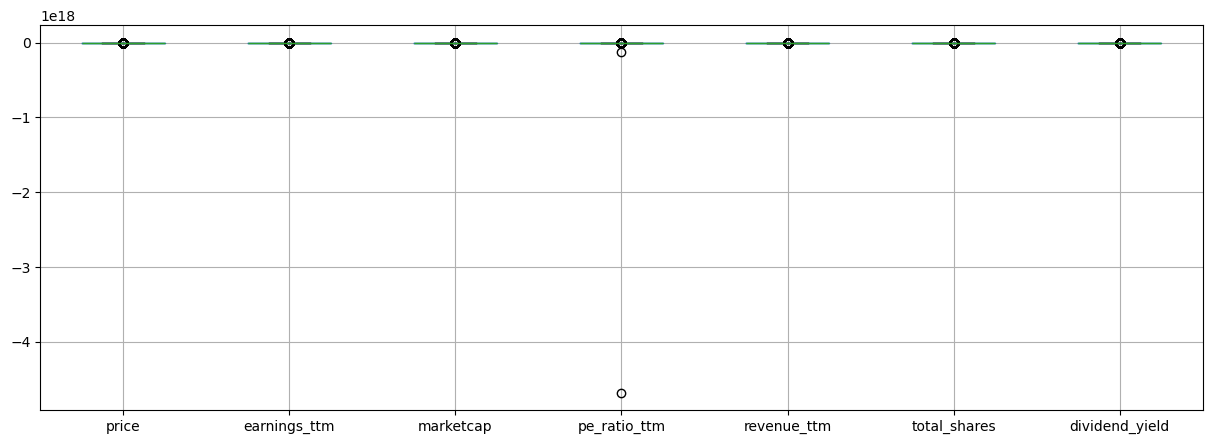

In [180]:
# Criei um boxplot para as colunas numéricas
data_numeric.boxplot(figsize=(15, 5))

**Percebe-se que as variáveis apresentam valores extremos para algumas colunas, estes valores extremos podem ser atribuídos aos outliers e devem ser tratados.**

In [181]:
# Criei uma função para tratar os outliers

def tratar_outliers_df(df):
    df_tratado = df.copy()
    colunas_numericas = df_tratado.select_dtypes(include=['number']).columns

    for col in colunas_numericas:
        Q1 = df_tratado[col].quantile(0.25)
        Q3 = df_tratado[col].quantile(0.75)
        IQR = Q3 - Q1

        limite_inferior = Q1 - 2 * IQR
        limite_superior = Q3 + 2 * IQR

        df_tratado[col] = df_tratado[col].apply(
            lambda x: limite_inferior if x < limite_inferior else (limite_superior if x > limite_superior else x)
        )

    return df_tratado

In [187]:
# Tratei os outliers do data_numeric
data_numeric = tratar_outliers_df(data_numeric)

In [182]:
data = tratar_outliers_df(data)

data.head()

,Name,price,country,earnings_ttm,marketcap,pe_ratio_ttm,revenue_ttm,total_shares,dividend_yield
0,LianBio,0.303832,United States,-108883750.0,3.283295e+07,-0.403797,0.000000e+00,1.080630e+08,0.000014
3,LMP Automotive Holdings,0.152392,United States,1468787.5,1.818265e+06,-0.150943,3.981080e+08,1.193150e+07,0.000014
4,MBIA,3.409771,United States,-828750000.0,1.739945e+08,-0.710317,-6.000000e+07,5.102820e+07,0.000014
7,TRxADE HEALTH,7.229095,United States,-25186500.0,1.265135e+07,-1.533330,5.536444e+06,1.750060e+06,0.000014
8,Merrimack Pharmaceuticals,14.410569,United States,-2823750.0,2.131093e+08,-52.236883,0.000000e+00,1.478840e+07,0.000014


<Axes: >

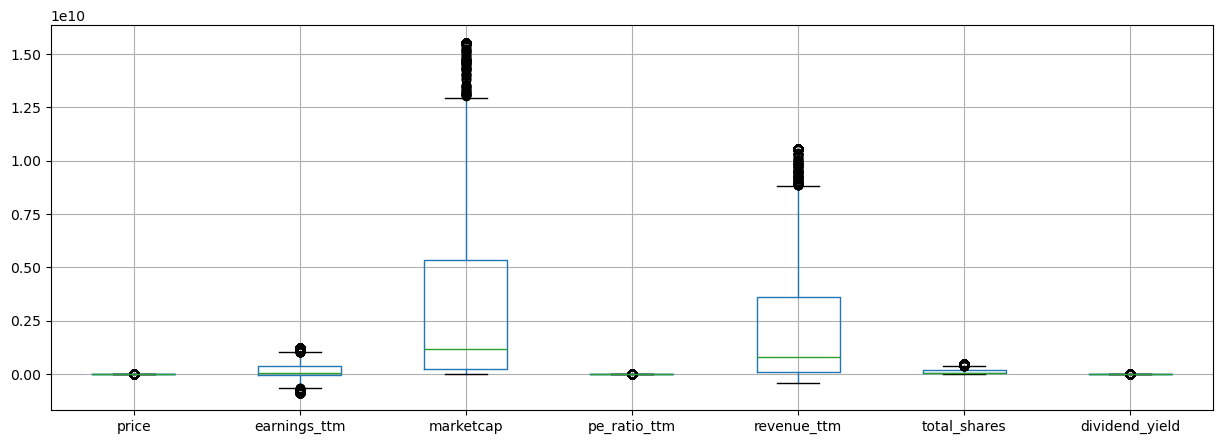

In [183]:
data.boxplot(figsize=(15, 5))

In [188]:
# Criei uma matriz de correlação Spearman
matriz_correlacao = data_numeric.corr(method="spearman")

<Axes: >

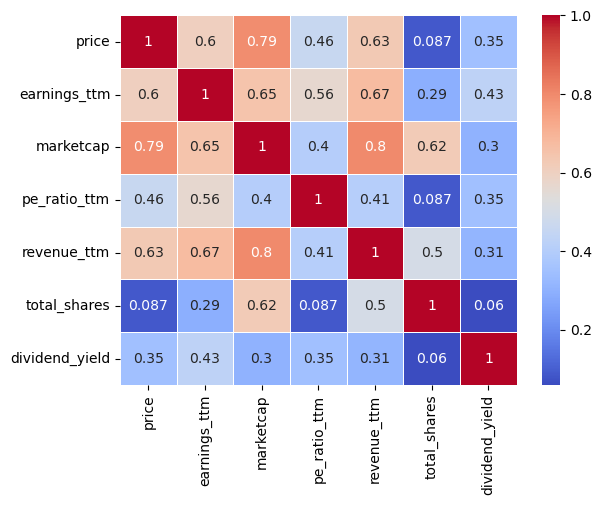

In [189]:
# Criei um heatmap para visualizar a matriz de correlação
sns.heatmap(matriz_correlacao, annot=True, cmap="coolwarm", linewidths=0.5, linecolor="white")

### Insights Gerais da Matriz de Correlação
🔺 **Correlações Fortes Positivas:**

price × marketcap (0.79):
⟶ Como esperado, empresas com ações mais caras tendem a ter maior capitalização de mercado.

revenue_ttm × marketcap (0.80):
⟶ Empresas com maiores receitas tendem a ter maior valor de mercado — uma relação lógica e relevante.

revenue_ttm × earnings_ttm (0.67):
⟶ Receita e lucro possuem correlação positiva significativa — empresas que faturam mais geralmente lucram mais.

earnings_ttm × price (0.60) e earnings_ttm × marketcap (0.65):
⟶ Empresas mais lucrativas tendem a ter ações mais caras e maior marketcap.

🟡 **Correlações Moderadas:**

pe_ratio_ttm × earnings_ttm (0.56) e × price (0.46):
⟶ O P/E (preço/lucro) tende a subir com o preço e com os lucros, mas a relação não é extremamente forte — o que pode indicar dispersão ou distorção nos múltiplos.

🔻 **Correlações Fracas ou Irrelevantes:**

total_shares × qualquer outra variável (máximo 0.62 com marketcap):
⟶ O número total de ações em circulação tem pouca correlação direta com métricas de preço, lucro ou receita. A correlação com marketcap é razoável, já que o marketcap = preço × total de ações.

dividend_yield × todas as outras (máximo 0.43):
⟶ O dividend yield não parece ter uma relação linear forte com nenhuma outra variável, sugerindo que seu comportamento pode ser influenciado por outros fatores complexos.

### 5. Clusterização com KMeans

In [199]:
# Importei bibliotecas
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [192]:
# Configurei o modelo KMeans para 4 clusters
clusters = 4

kmeans = KMeans(n_clusters=clusters, random_state=42)

In [193]:
# Ajustei o modelo aos dados
kmeans.fit(data_numeric)

# Criei uma nova coluna com as etiquetas de cluster
data["cluster"] = kmeans.labels_

In [203]:
data.head()

,Name,price,country,earnings_ttm,marketcap,pe_ratio_ttm,revenue_ttm,total_shares,dividend_yield,cluster
0,LianBio,0.303832,United States,-108883750.0,3.283295e+07,-0.403797,0.000000e+00,1.080630e+08,0.000014,3
3,LMP Automotive Holdings,0.152392,United States,1468787.5,1.818265e+06,-0.150943,3.981080e+08,1.193150e+07,0.000014,3
4,MBIA,3.409771,United States,-828750000.0,1.739945e+08,-0.710317,-6.000000e+07,5.102820e+07,0.000014,3
7,TRxADE HEALTH,7.229095,United States,-25186500.0,1.265135e+07,-1.533330,5.536444e+06,1.750060e+06,0.000014,3
8,Merrimack Pharmaceuticals,14.410569,United States,-2823750.0,2.131093e+08,-52.236883,0.000000e+00,1.478840e+07,0.000014,3


In [196]:
# Verifiquei a contagem de empresas por cluster
data['cluster'].value_counts()

cluster
3    2898
1     667
2     499
0     294
Name: count, dtype: int64

C:\ProgramData\anaconda3\envs\ds_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


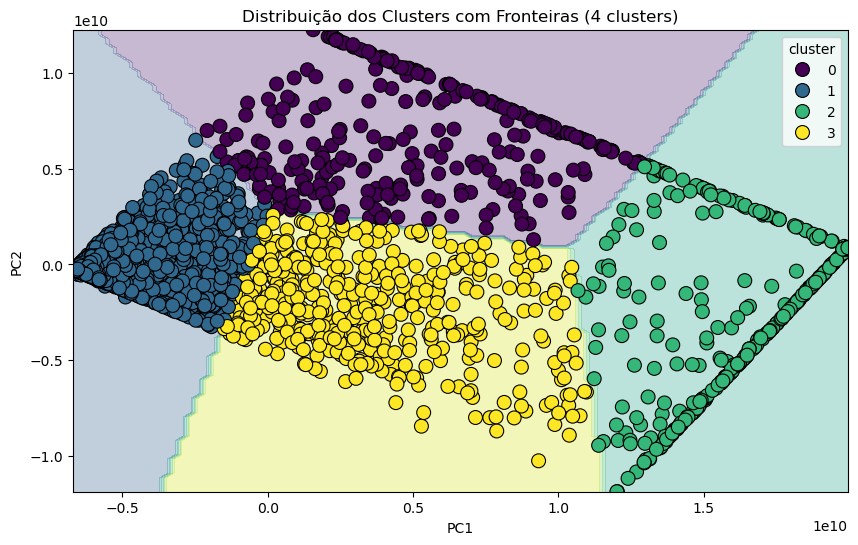

In [207]:
# Plotei um gráfico de dispersão para visualizar os clusters

# Selecionei apenas as colunas numéricas do dataframe 'data'
data_numeric = data.select_dtypes(include=np.number)

# Apliquei PCA para reduzir para 2 componentes principais
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_numeric)

# Adicionei as componentes principais ao dataframe
data['PC1'] = principal_components[:, 0]
data['PC2'] = principal_components[:, 1]

# Apliquei o KMeans com 4 clusters
kmeans = KMeans(n_clusters=4)
data['cluster'] = kmeans.fit_predict(data_numeric)

# Criei o meshgrid para as duas componentes principais (PC1 e PC2)
x_min, x_max = data['PC1'].min() - 1, data['PC1'].max() + 1
y_min, y_max = data['PC2'].min() - 1, data['PC2'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Projetei os pontos da grade para o espaço original, utilizando apenas PC1 e PC2
Z = kmeans.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plotei o gráfico de dispersão com as fronteiras dos clusters
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')  # As fronteiras dos clusters

# Plotei os pontos de dados reais com os clusters
sns.scatterplot(data=data, x='PC1', y='PC2', hue='cluster', palette='viridis', s=100, marker='o', edgecolor='black')

plt.title('Distribuição dos Clusters com Fronteiras (4 clusters)')
plt.show()

In [214]:
# Agrupei os dados por clusters e calculei a media das variáveis numéricas

agrupado = data_numeric.groupby('cluster').mean()

agrupado

,price,earnings_ttm,marketcap,pe_ratio_ttm,revenue_ttm,total_shares,dividend_yield,PC1,PC2
cluster,,,,,,,,,
0,17.193626,2.690615e+06,7.992295e+08,3.628790,6.511637e+08,8.092188e+07,3.710898e-06,-3.673802e+09,-5.761751e+07
1,94.261733,9.881612e+08,1.498621e+10,25.339975,8.766839e+09,3.113525e+08,8.907320e-07,1.269200e+10,-6.227605e+08
2,69.624216,3.644089e+08,6.610546e+09,15.079509,2.518749e+09,1.524084e+08,3.082501e-06,2.262005e+09,-1.527315e+09
3,42.650550,4.969459e+08,4.514996e+09,9.736762,8.396865e+09,1.909087e+08,4.786229e-06,3.579504e+09,4.573085e+09


In [215]:
# Criei uma função para classificar o tipo de empresa de acordo com o cluster

def classify_growth_potential(row):
    # Classificando com base em marketcap, price, PE ratio e revenue_ttm
    if row['marketcap'] > 1e10 and row['pe_ratio_ttm'] > 20:
        return 'Muito Alto'
    elif row['marketcap'] > 5e9 and row['pe_ratio_ttm'] > 10:
        return 'Alto'
    elif row['marketcap'] > 1e9 and row['pe_ratio_ttm'] > 5:
        return 'Mediano'
    else:
        return 'Baixo'

In [216]:
# Criei uma nova coluna com as classificações
data['growth_potential'] = data.apply(classify_growth_potential, axis=1)

In [219]:
data.tail(10)

,Name,price,country,earnings_ttm,marketcap,pe_ratio_ttm,revenue_ttm,total_shares,dividend_yield,cluster,PC1,PC2,growth_potential
9827,BloomZ,0.788629,United States,-1.176358e+05,1.059112e+07,43.867700,1.072564e+06,1.342980e+07,0.0,1,-6.626493e+09,-2.741683e+08,Baixo
9831,Lineage,73.814875,United States,-8.375000e+07,1.553420e+10,-31.955100,6.681625e+09,2.513830e+08,0.0,2,1.696377e+10,-3.833609e+09,Baixo
9835,Concentra Group,21.353929,United States,3.909212e+08,2.703279e+09,0.000000,2.336112e+09,1.265940e+08,0.0,1,-1.624250e+09,5.362217e+08,Baixo
9984,OS Therapies,2.838301,United States,-4.966800e+06,5.927678e+07,-7.649890,0.000000e+00,2.088460e+07,0.0,1,-6.569129e+09,-3.119362e+08,Baixo
9994,Zenas BioPharma,16.763120,United States,-7.054500e+07,6.670448e+08,-51.939400,6.250000e+07,3.979240e+07,0.0,1,-5.798604e+09,-6.926298e+08,Baixo
9995,MBX Biosciences,23.125486,United States,-4.070375e+07,7.366323e+08,0.000000,0.000000e+00,3.185370e+07,0.0,1,-5.759078e+09,-8.185038e+08,Baixo
9996,Bicara Therapeutics,23.620760,United States,-6.497500e+07,1.284636e+09,-52.236883,0.000000e+00,5.438590e+07,0.0,1,-5.103038e+09,-1.228131e+09,Baixo
9999,BKV Corporation,17.334495,United States,-9.151375e+07,1.458275e+09,-12.410500,8.279900e+08,8.412560e+07,0.0,1,-4.281365e+09,-3.642297e+08,Baixo
10000,BioAge Labs,20.849131,United States,-6.294000e+07,7.019318e+08,0.000000,0.000000e+00,3.366720e+07,0.0,1,-5.802619e+09,-7.934416e+08,Baixo
10001,Legacy Education,4.332981,United States,8.327250e+06,4.925386e+07,28.461400,5.212298e+07,1.136720e+07,0.0,1,-6.541482e+09,-2.413920e+08,Baixo


In [222]:
# Verifiquei em quais clusteres as empresas tem potencial de crescimento alto estão mais concentradas

data.groupby('cluster')['growth_potential'].value_counts()

cluster  growth_potential
0        Mediano              114
         Baixo                104
         Alto                  79
1        Baixo               2391
         Mediano              513
2        Muito Alto           384
         Alto                 159
         Baixo                 74
         Mediano               49
3        Alto                 195
         Baixo                136
         Mediano              130
         Muito Alto            30
Name: count, dtype: int64

**Definindo a relação dos clusters:**

**Cluster 0:** Tem empresas com uma distribuição mista de baixo, mediano e alto potencial. Pode ser categorizado como Empresas de Potencial Mediano.

**Cluster 1:** Dominado por baixo potencial, logo, será Empresas de Baixo Potencial.

**Cluster 2:** Tem uma alta concentração de muito alto e alto potencial. Este será Empresas de Muito Alto Potencial.

**Cluster 3:** Contém muitas empresas com alto potencial, portanto, será Empresas de Alto Potencial.

In [224]:
# Criei uma função para renomear os clusters com base no potencial de crescimento

def rename_clusters(row):
    cluster_mapping = {
        0: 'Empresas de Potencial Mediano',
        1: 'Empresas de Baixo Potencial',
        2: 'Empresas de Muito Alto Potencial',
        3: 'Empresas de Alto Potencial'
    }
    return cluster_mapping.get(row['cluster'], 'Cluster Desconhecido')

In [225]:
# Aplicar a função para renomear os clusters

data['potencial'] = data.apply(rename_clusters, axis=1)

In [227]:
# Dropei as colunas desnecessários

col_desn = ['PC1', 'PC2', 'cluster', 'growth_potential']

for col in col_desn:
    data = data.drop(col, axis=1)

In [228]:
data.head()

,Name,price,country,earnings_ttm,marketcap,pe_ratio_ttm,revenue_ttm,total_shares,dividend_yield,potencial
0,LianBio,0.303832,United States,-108883750.0,3.283295e+07,-0.403797,0.000000e+00,1.080630e+08,0.000014,Empresas de Baixo Potencial
3,LMP Automotive Holdings,0.152392,United States,1468787.5,1.818265e+06,-0.150943,3.981080e+08,1.193150e+07,0.000014,Empresas de Baixo Potencial
4,MBIA,3.409771,United States,-828750000.0,1.739945e+08,-0.710317,-6.000000e+07,5.102820e+07,0.000014,Empresas de Baixo Potencial
7,TRxADE HEALTH,7.229095,United States,-25186500.0,1.265135e+07,-1.533330,5.536444e+06,1.750060e+06,0.000014,Empresas de Baixo Potencial
8,Merrimack Pharmaceuticals,14.410569,United States,-2823750.0,2.131093e+08,-52.236883,0.000000e+00,1.478840e+07,0.000014,Empresas de Baixo Potencial


In [229]:
# Exportei o dataframe para um arquivo CSV

data.to_csv('portencial_empresarial.csv', index=False)

### 6. Modelo de Classificação XGBoost

In [232]:
# Importei bibliotecas

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix

In [234]:
# Numerizei a coluna potencial

data['potencial'] = data['potencial'].map({'Empresas de Potencial Mediano': 1, 'Empresas de Baixo Potencial': 0, 'Empresas de Muito Alto Potencial': 3, 'Empresas de Alto Potencial': 2})

In [235]:
# Selecionei as colunas numericas para o modelo

data_model = data.select_dtypes(include=np.number)

data_model.head()

,price,earnings_ttm,marketcap,pe_ratio_ttm,revenue_ttm,total_shares,dividend_yield,potencial
0,0.303832,-108883750.0,3.283295e+07,-0.403797,0.000000e+00,1.080630e+08,0.000014,0
3,0.152392,1468787.5,1.818265e+06,-0.150943,3.981080e+08,1.193150e+07,0.000014,0
4,3.409771,-828750000.0,1.739945e+08,-0.710317,-6.000000e+07,5.102820e+07,0.000014,0
7,7.229095,-25186500.0,1.265135e+07,-1.533330,5.536444e+06,1.750060e+06,0.000014,0
8,14.410569,-2823750.0,2.131093e+08,-52.236883,0.000000e+00,1.478840e+07,0.000014,0


In [240]:
# Dividi o dataset em features (X) e target (y)

X = data_model.drop('potencial', axis=1)
y = data_model['potencial']

In [241]:
# Dividi o dataset em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [242]:
# Treinei o modelo XGBoost Classifier

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [243]:
# Fiz as previsões com o modelo treinado

y_pred = model.predict(X_test)

In [250]:
# Avaliei o modelo

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.99
Recall: 0.99
F1 Score: 0.98


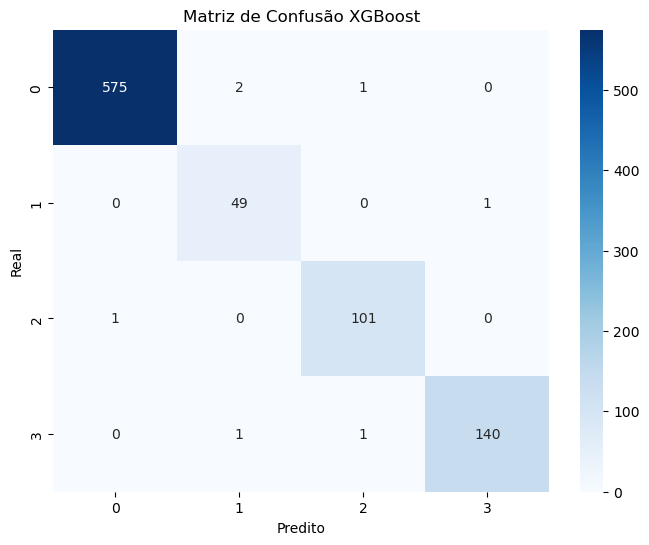

In [251]:
# Matriz de confusão

cm = confusion_matrix(y_test, y_pred)

# Criei heatmap da matriz de confusão

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão XGBoost')
plt.show()

 ### 📊 **Insights Gerais:**

✅ **1. Alta Acurácia nas Classes:**
Classe 0 (Baixo Potencial): 575 de 578 amostras foram corretamente classificadas.

Classe 1 (Mediano): 49 de 50 amostras corretas.

Classe 2 (Alto): 101 de 102 acertos.

Classe 3 (Muito Alto): 140 de 142 acertos.

O modelo está acertando quase todas as amostras por classe. Isso indica boa performance geral.

⚠️ **2. Erros Pequenos, mas Relevantes:**
A maior confusão está entre:

Classe 0 e Classe 1 (2 casos).

Classe 3 e Classes 1 e 2 (1 erro para cada).

Classe 2 e Classe 0 (1 erro).

Esses erros fazem sentido, pois classes próximas em termos de “potencial de crescimento” podem ter características similares.

In [252]:
# Exportei o modelo em pkl

import pickle

with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# Criei uma função para fazer as previsões a partir de novo dataframe de entrada

def fazer_previsoes(df):
    # Fazendo previsões com o modelo treinado
    y_pred = model.predict(df)
    # Retornei as previsões
    return y_pred

In [259]:
# verifiquei o tipo dos dados do data-model

data_model.dtypes

price             float64
earnings_ttm      float64
marketcap         float64
pe_ratio_ttm      float64
revenue_ttm       float64
total_shares      float64
dividend_yield    float64
potencial           int64
dtype: object

In [260]:
# Extraí o csv do dataframe X_test

X_test.to_csv('X_test.csv', index=False)